# Logistic Regression: Income Classification

In this project, we will be using a dataset containing census information from the 1994 Census database to create a logistic regression model that predicts whether or not a person makes more than $50,000.

Let’s get started!

Datasets
The original data set is available at the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/census+income).

The dataset has been loaded for you in script.py and saved as a DataFrame named df. Some of the input and output features of interest are:

age: continuous

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,1st-4th, 10th, Doctorate, 5th-6th, Preschool

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

sex: Female, Male

capital-gain: continuous

capital-loss: continuous

hours-per-week: continuous

native country: discrete

income: discrete, >50K, <=50K

## Set Up

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data',header = None, names = col_names)

In [3]:
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
    
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Task 1: The dataset has been loaded for you in script.py and saved as a dataframe named df. The outcome variable here is income. Check if the dataset is imbalanced.

In [4]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

There is some imbalance in the dataset - the vast majority work in the private sector, and only 7 have never worked and 14 worked without any pay

## Task 2: Note that all the predictor variables are all categorical. Transform the dataset of predictor variables to dummy variables and save this in a new DataFrame called df_dummies.

In [5]:
predictors = df[['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']]
df_dummies = pd.get_dummies(predictors,drop_first = True)
df_dummies.head()

,age,capital-gain,capital-loss,hours-per-week,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39,2174,0,40,40,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,50,0,0,13,13,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,38,0,0,40,40,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,53,0,0,40,40,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,40,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Task 3: Using df_dummies, create a heatmap of the correlation values.

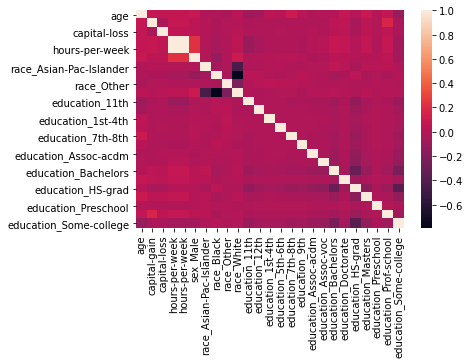

In [6]:
sns.heatmap(df_dummies.corr())
plt.show()

## Task 4: Determine is scaling is needed for df_dummies prior to modeling. Create output variable y which is binary, 0 when income is less than 50K, 1 when it is greather than 50K.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['income'])
label

y = label

## Task 5: Using x_train, x_test, y_train, y_test, fit a logistic regression model in scikit-learn on the training set with parameters C=0.05, penalty='l1', solver='liblinear'.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df_dummies,y, random_state=1, test_size=.2)

log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

## Task 6: Print the model parameters (intercept and coefficients).

In [22]:
print('Model Parameters, Intercept:')
print(log_reg.intercept_[0])
print('Model Parameters, Coeff:')
print(log_reg.coef_)

Model Parameters, Intercept:
-5.482149516912433
Model Parameters, Coeff:
[[ 3.61383194e-02  3.14303234e-04  6.65497420e-04  1.70004578e-02
   1.44078602e-02  1.02075798e+00  0.00000000e+00 -3.96765377e-01
   0.00000000e+00  4.65663829e-02 -5.85005547e-01  0.00000000e+00
   0.00000000e+00 -4.08132353e-01 -8.97997031e-01 -5.07825408e-01
   5.62647275e-01  5.38176998e-01  1.27201152e+00  1.79080506e+00
   0.00000000e+00  1.59015426e+00  0.00000000e+00  1.81529693e+00
   3.75236677e-01]]


## Task 7: Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.

In [23]:
print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy Score on test set: {log_reg.score(x_test, y_test)}')

Confusion Matrix on test set:
[[4782  244]
 [ 879  608]]
Accuracy Score on test set: 0.8275756179947796


## Task 8: Create a new DataFrame of the model coefficients and variable names. Sort values based on coefficient and exclude any that are equal to zero. Print the values of the DataFrame.

In [24]:
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
print(coef_df)

                       var      coef
14       education_7th-8th -0.897997
10          education_11th -0.585006
15           education_9th -0.507825
13       education_5th-6th -0.408132
7               race_Black -0.396765
1             capital-gain  0.000314
2             capital-loss  0.000665
4           hours-per-week  0.014408
3           hours-per-week  0.017000
0                      age  0.036138
9               race_White  0.046566
24  education_Some-college  0.375237
17     education_Assoc-voc  0.538177
16    education_Assoc-acdm  0.562647
5                 sex_Male  1.020758
18     education_Bachelors  1.272012
21       education_Masters  1.590154
19     education_Doctorate  1.790805
23   education_Prof-school  1.815297


## Task 9: Create a barplot of the coefficients sorted in ascending order. What are the most important features?

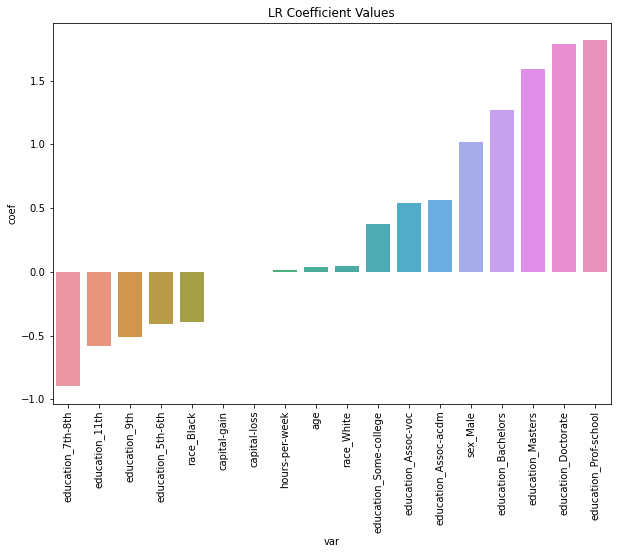

In [25]:
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90);
plt.title('LR Coefficient Values')
plt.show()
plt.close()

## Task 10: Plot the ROC curve and print the AUC value.

ROC AUC score: 0.8454503294368946


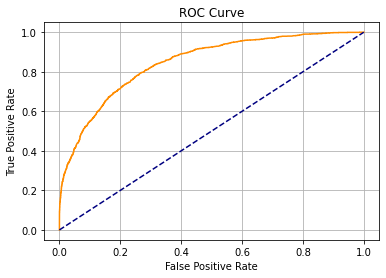

In [26]:
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()